In [1]:
# Importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing datasets
pvs1_gps_mpu_left_filepath = r"archive/PVS 1/dataset_gps_mpu_left.csv"
pvs1_gps_mpu_right_filepath = r"archive/PVS 1/dataset_gps_mpu_right.csv"
pvs4_gps_mpu_left_filepath = r"archive/PVS 4/dataset_gps_mpu_left.csv"
pvs4_gps_mpu_right_filepath = r"archive/PVS 4/dataset_gps_mpu_right.csv"
pvs7_gps_mpu_left_filepath = r"archive/PVS 7/dataset_gps_mpu_left.csv"
pvs7_gps_mpu_right_filepath = r"archive/PVS 7/dataset_gps_mpu_right.csv"

pvs1_gps_mpu_left = pd.read_csv(pvs1_gps_mpu_left_filepath)
pvs1_gps_mpu_right = pd.read_csv(pvs1_gps_mpu_left_filepath)
pvs4_gps_mpu_left = pd.read_csv(pvs4_gps_mpu_left_filepath)
pvs4_gps_mpu_right = pd.read_csv(pvs4_gps_mpu_left_filepath)
pvs7_gps_mpu_left = pd.read_csv(pvs7_gps_mpu_left_filepath)
pvs7_gps_mpu_right = pd.read_csv(pvs7_gps_mpu_left_filepath)

In [14]:
def concat(right, left):

    pvs = pd.concat([left, right], axis=1)

    # Rename columns to distinguish between left and right sensor data
    pvs.columns = [
        'timestamp', 'acc_x_dashboard_l', 'acc_y_dashboard_l', 'acc_z_dashboard_l',
        'acc_x_above_suspension_l', 'acc_y_above_suspension_l', 'acc_z_above_suspension_l', 
        'acc_x_below_suspension_l', 'acc_y_below_suspension_l', 'acc_z_below_suspension_l', 
        'gyro_x_dashboard_l', 'gyro_y_dashboard_l', 'gyro_z_dashboard_l', 'gyro_x_above_suspension_l', 
        'gyro_y_above_suspension_l', 'gyro_z_above_suspension_l', 'gyro_x_below_suspension_l', 
        'gyro_y_below_suspension_l', 'gyro_z_below_suspension_l', 'mag_x_dashboard_l', 'mag_y_dashboard_l', 
        'mag_z_dashboard_l', 'mag_x_above_suspension_l', 'mag_y_above_suspension_l', 'mag_z_above_suspension_l', 
        'temp_dashboard_l', 'temp_above_suspension_l', 'temp_below_suspension_l', 'timestamp_gps', 
        'latitude', 'longitude', 'speed', 'timestamp', 'acc_x_dashboard_r', 'acc_y_dashboard_r', 
        'acc_z_dashboard_r', 'acc_x_above_suspension_r', 'acc_y_above_suspension_r', 
        'acc_z_above_suspension_r', 'acc_x_below_suspension_r', 'acc_y_below_suspension_r', 
        'acc_z_below_suspension_r', 'gyro_x_dashboard_r', 'gyro_y_dashboard_r', 'gyro_z_dashboard_r', 
        'gyro_x_above_suspension_r', 'gyro_y_above_suspension_r', 'gyro_z_above_suspension_r', 
        'gyro_x_below_suspension_r', 'gyro_y_below_suspension_r', 'gyro_z_below_suspension_r', 
        'mag_x_dashboard_r', 'mag_y_dashboard_r', 'mag_z_dashboard_r', 'mag_x_above_suspension_r', 
        'mag_y_above_suspension_r', 'mag_z_above_suspension_r', 'temp_dashboard_r', 'temp_above_suspension_r', 
        'temp_below_suspension_r', 'timestamp_gps', 'latitude', 'longitude', 'speed'
    ]

    # Remove duplicate columns (those with the same name, e.g., 'timestamp_gps', 'latitude', etc.)
    pvs_removed = pvs.loc[:, ~pvs.columns.duplicated()]

    return pvs_removed

pvs1 = concat(pvs1_gps_mpu_left, pvs1_gps_mpu_right)
pvs4 = concat(pvs4_gps_mpu_left, pvs4_gps_mpu_right)
pvs7 = concat(pvs7_gps_mpu_left, pvs7_gps_mpu_right)

print(f"pvs1 datashape after removing duplicate features {pvs1.shape}")
print(f"pvs4 datashape after removing duplicate features {pvs4.shape}")
print(f"pvs7 datashape after removing duplicate features {pvs7.shape}")

pvs1 datashape after removing duplicate features (144036, 59)
pvs4 datashape after removing duplicate features (132492, 59)
pvs7 datashape after removing duplicate features (128548, 59)


Features on the correlation matrix of pvs1 (59, 59)
Features on the correlation matrix of pvs4 (59, 59)
Features on the correlation matrix of pvs7 (59, 59)


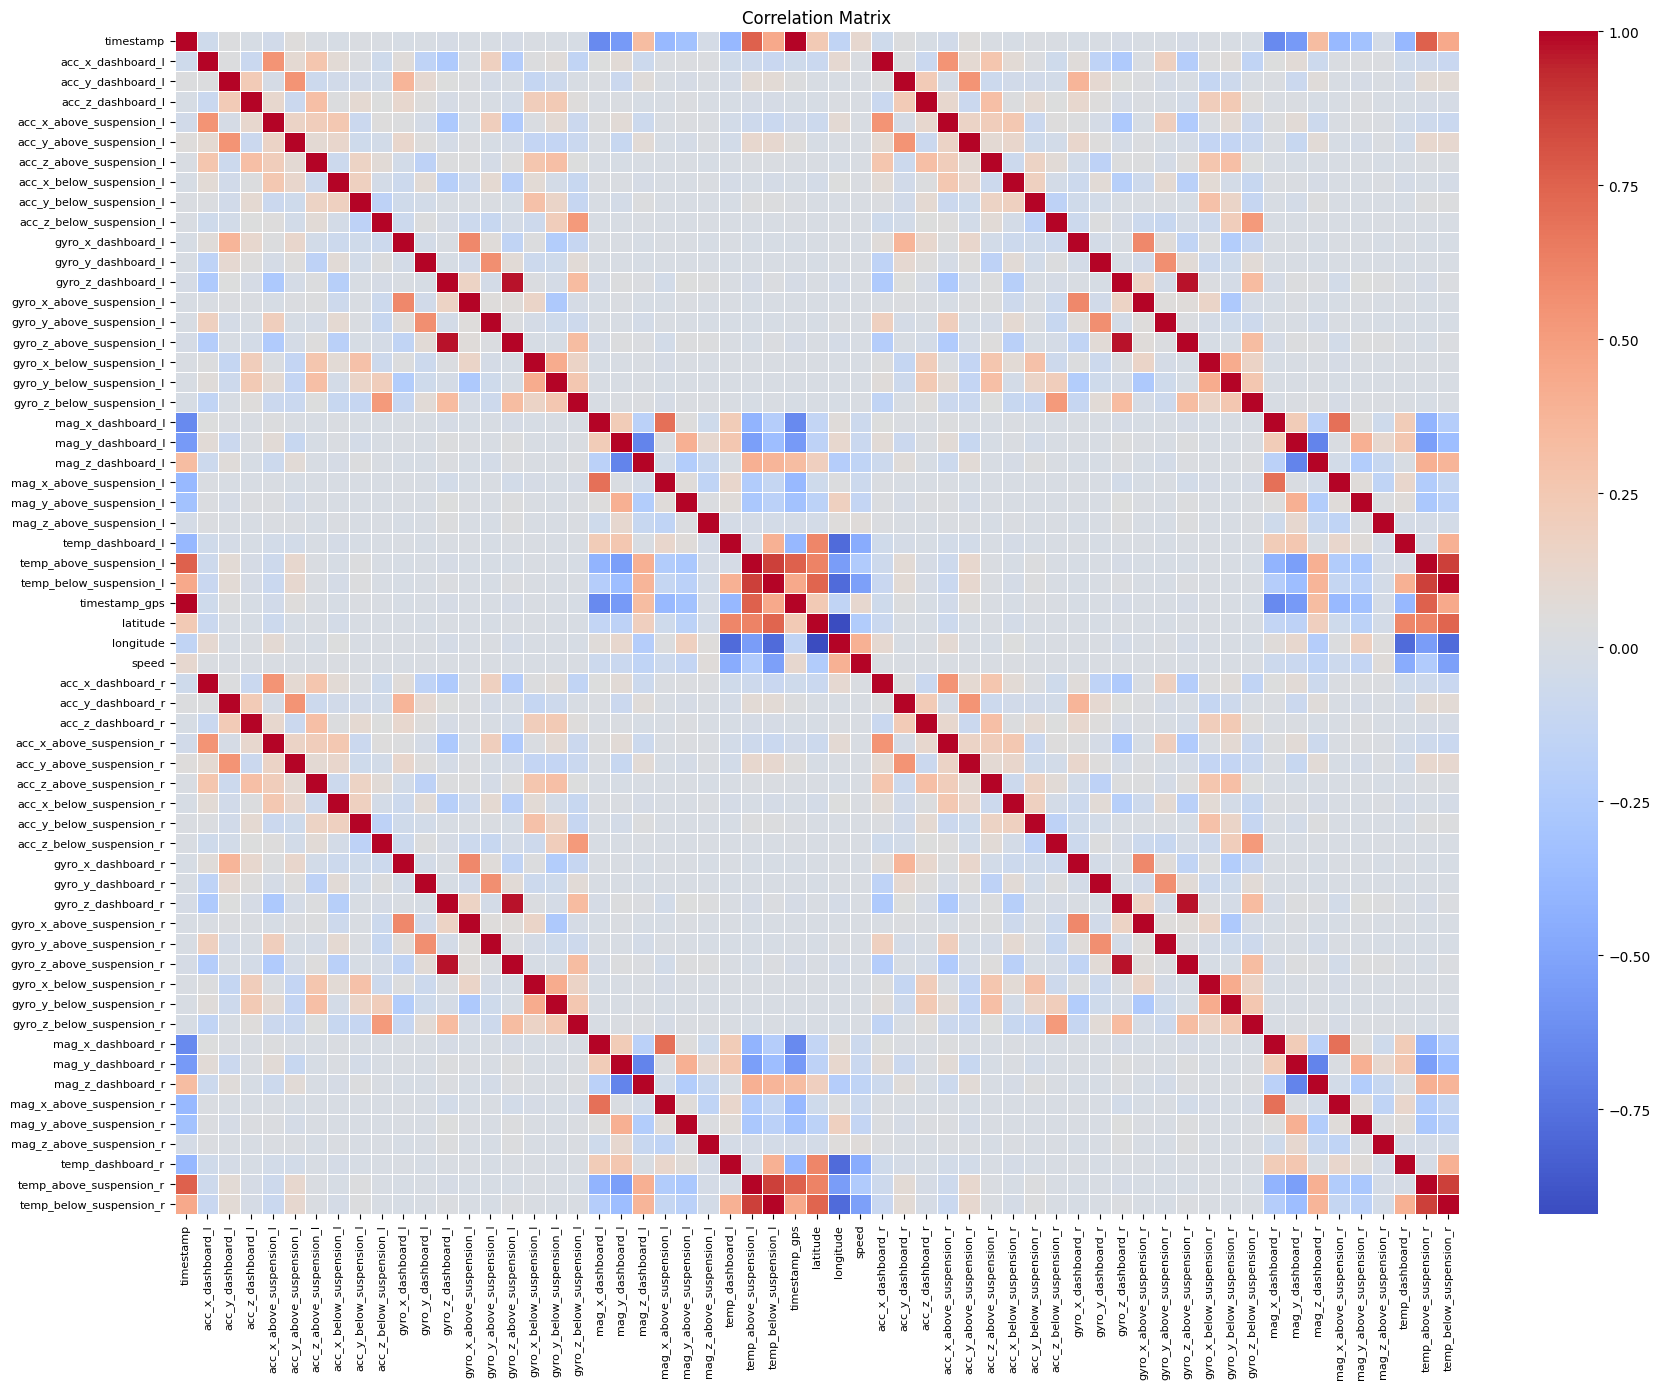

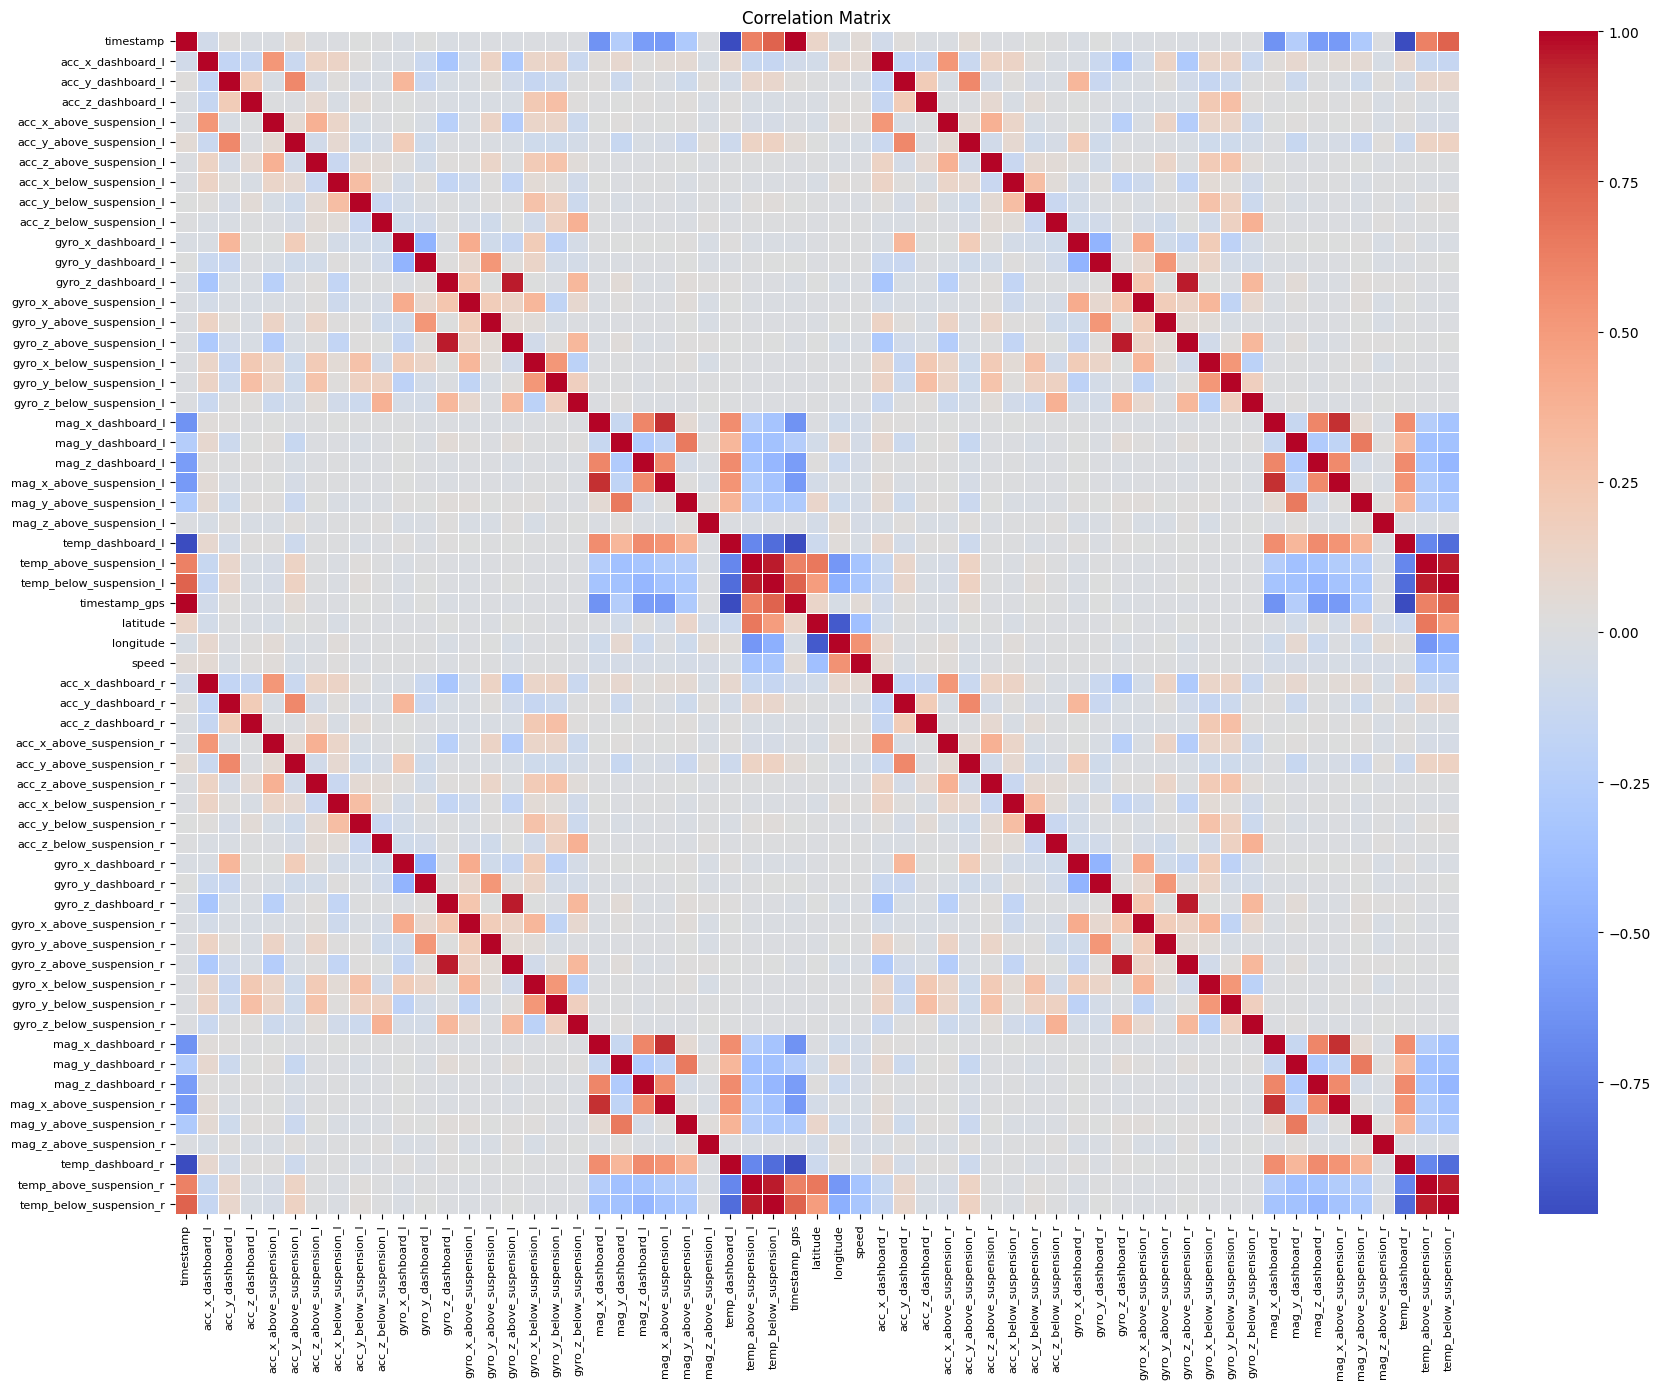

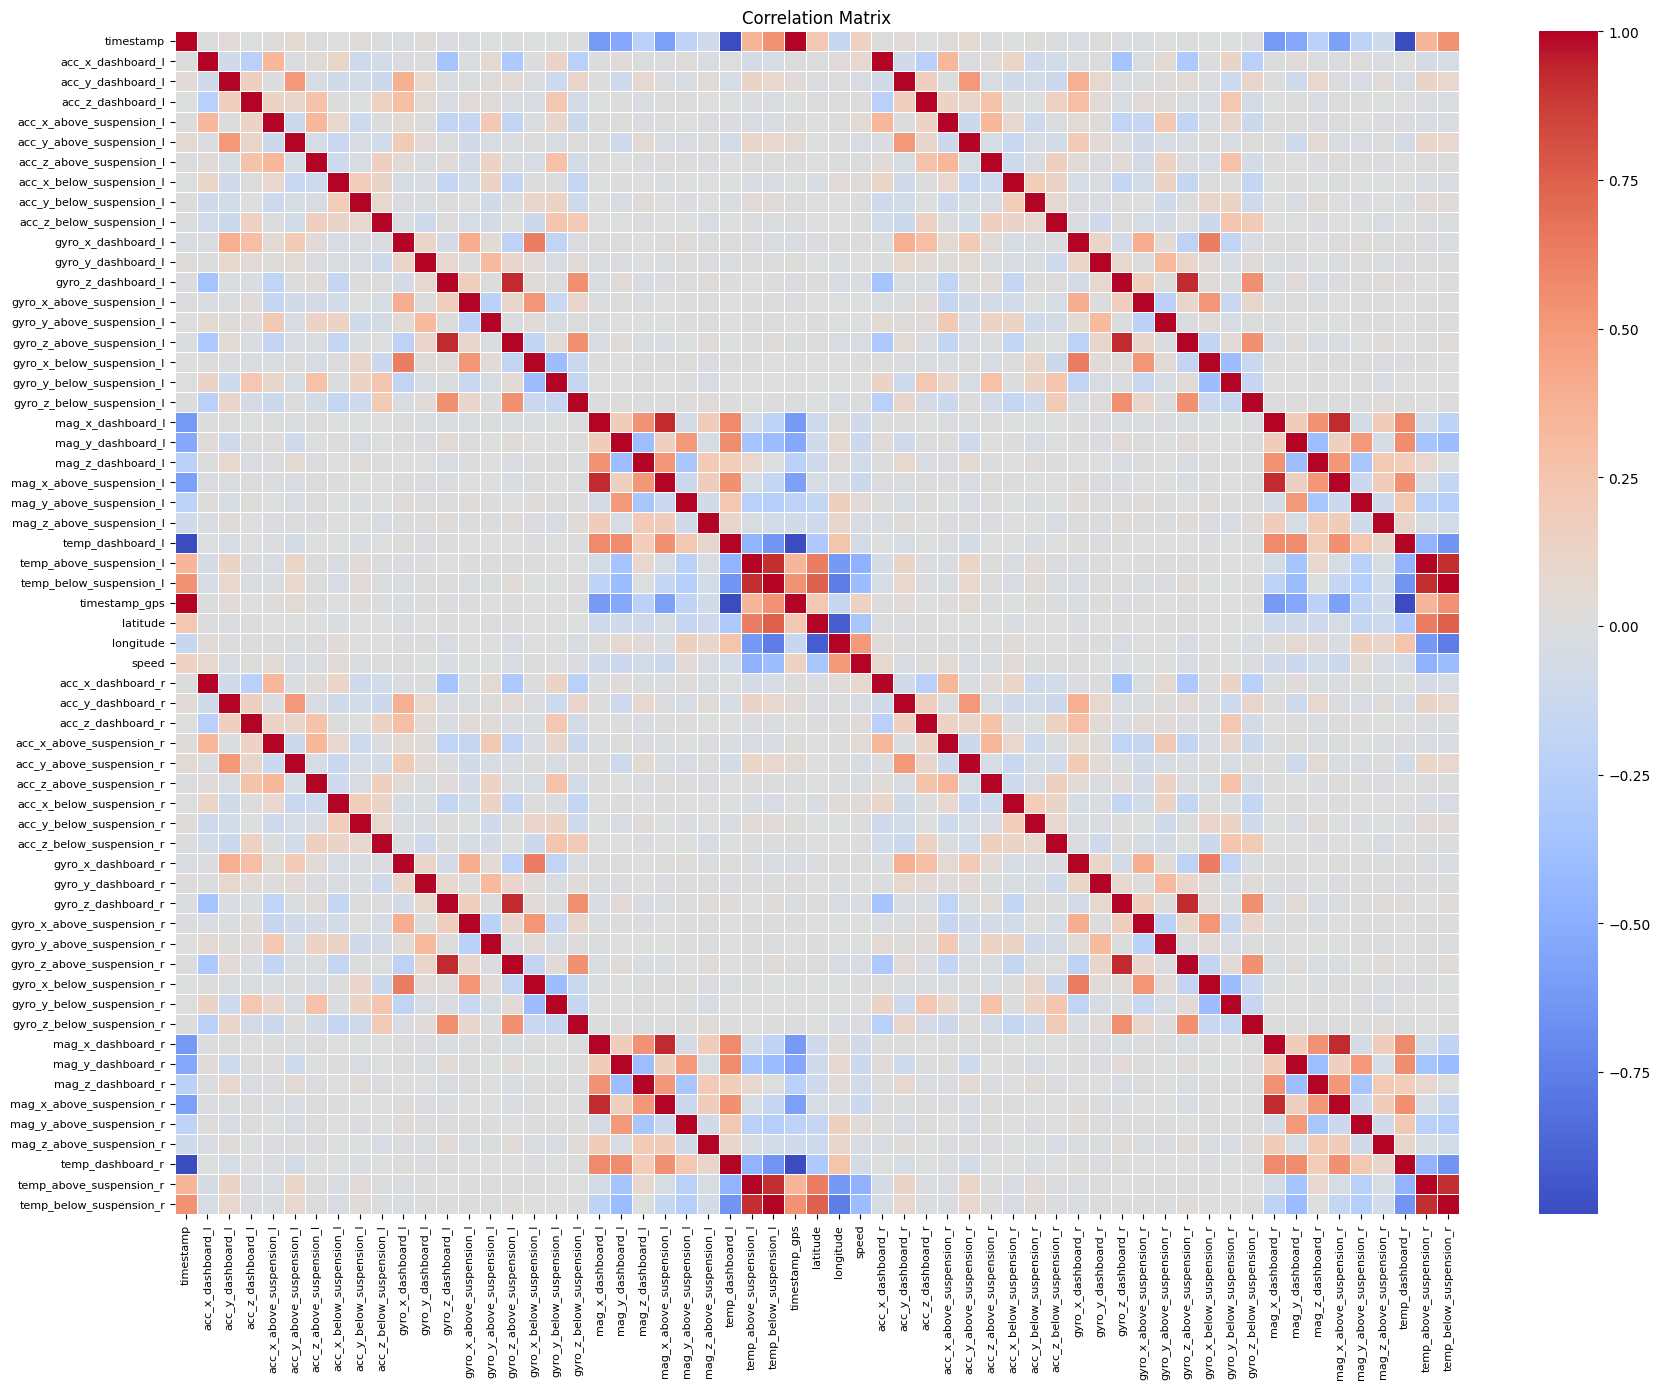

In [ ]:
def corr_mat(pvs):

    #keep only numeric values 
    numeric_df = pvs.select_dtypes(include=['number'])

    #print(numeric_df.columns)
    correlation_matrix=numeric_df.corr()

    return correlation_matrix

def plot_corr_mat(correlation_matrix):

    # Create the heatmap
    plt.figure(figsize=(18, 14))  # Increase the size of the figure

    # Plot the heatmap with adjusted figure size
    sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

    # Rotate the tick labels for better readability and shrink font size
    plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels by 90 degrees and adjust font size
    plt.yticks(rotation=0, fontsize=8)   # Keep y-axis labels horizontal and adjust font size

    # Add a title with smaller font size
    plt.title("Correlation Matrix", fontsize=12)

    # Show the plot with a tight layout
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

corr_mat_pvs1 = corr_mat(pvs1)
corr_mat_pvs4 = corr_mat(pvs4)
corr_mat_pvs7 = corr_mat(pvs7)

print(f"Features on the correlation matrix of pvs1 {corr_mat_pvs1.shape}")
print(f"Features on the correlation matrix of pvs4 {corr_mat_pvs4.shape}")
print(f"Features on the correlation matrix of pvs7 {corr_mat_pvs7.shape}")

plot_corr_mat(corr_mat_pvs1)
plot_corr_mat(corr_mat_pvs4)
plot_corr_mat(corr_mat_pvs7)


In [22]:
def remove_corr_features(threshold, correlation_matrix, pvs):

    #take absoulute values
    corr_matrix_abs=correlation_matrix.abs()

    #take only upper diagonal 
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    highly_correlated_features=np.where(corr_matrix_abs*mask>threshold)

    #print and store highly correlated features

    to_drop = set()
    for i, j in zip(*highly_correlated_features):
        to_drop.add(corr_matrix_abs.columns[j])


    #remove to_drop columns
    cleaned_pvs=pvs.drop(columns=to_drop)
    print(f"removed {len(to_drop)} columns")
    print(f"new dataframe has shape {cleaned_pvs.shape}")

    return cleaned_pvs

threshold = 0.99

pvs1_cleaned = remove_corr_features(threshold, corr_mat_pvs1, pvs1)
pvs4_cleaned = remove_corr_features(threshold, corr_mat_pvs4, pvs4)
pvs7_cleaned = remove_corr_features(threshold, corr_mat_pvs7, pvs7)

print(f"pvs1 datashape after removing highly correlated features {pvs1_cleaned.shape}")
print(f"pvs4 datashape after removing highly correlated features {pvs4_cleaned.shape}")
print(f"pvs7 datashape after removing highly correlated features {pvs7_cleaned.shape}")


removed 28 columns
new dataframe has shape (144036, 31)
removed 28 columns
new dataframe has shape (132492, 31)
removed 28 columns
new dataframe has shape (128548, 31)
pvs1 datashape after removing highly correlated features (144036, 31)
pvs4 datashape after removing highly correlated features (132492, 31)
pvs7 datashape after removing highly correlated features (128548, 31)


In [ ]:
# Find columns unique to each DataFrame
unique_to_pvs1 = set(pvs1_cleaned.columns) - set(pvs4_cleaned.columns)
unique_to_pvs4 = set(pvs4_cleaned.columns) - set(pvs1_cleaned.columns)

# Combine the results to find all non-shared columns
non_shared_columns = unique_to_pvs1.union(unique_to_pvs4)

# Print the results
print(f"Columns unique to pvs1_cleaned: {unique_to_pvs1}")
print(f"Columns unique to pvs4_cleaned: {unique_to_pvs4}")
print(f"Total non-shared columns: {non_shared_columns}")


Columns unique to pvs1_cleaned: set()
Columns unique to pvs4_cleaned: set()
Total non-shared columns: set()


: 